In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

def MAE(y_true,y_pred):
    return round(mean_absolute_error(y_true,y_pred),2)

def W_SMAPE(y_true, y_pred):
    if not isinstance(y_true,np.ndarray):y_true = y_true.to_numpy()
    if not isinstance(y_pred,np.ndarray):y_pred = y_pred.to_numpy()
    smape = np.where(
        (y_true == 0) & (y_pred == 0), 
        0, 
        100 * np.abs((y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred)))
    )
    return np.round(np.mean(smape),2)

# Generated Data

In [2]:
def trend(time, slope, baseline):
    return slope * time + baseline

def seasonal_pattern(season_time):
    return np.where(season_time<0.4,
                    np.cos(season_time*2*np.pi),
                    1 / np.exp(3*season_time))

def seasonality(time, period, amplitude=1, phase=0):
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

In [3]:
# config
baseline = 50
amplitude = 20
slope = 0.09
noise_level = 10
seed = 42
time = np.arange((5 * 365 )+ 1, dtype = 'float32')
# data
trend_data = trend(time,slope,baseline)
season_data = seasonality(time, period=365, amplitude=amplitude)
noise_data = noise(time, noise_level=noise_level, seed=seed)
clean_data = trend_data+season_data
data = trend_data+season_data+noise_data
# df
ls_data = list(zip(trend_data,season_data,noise_data,clean_data,data))
df_data = pd.DataFrame(ls_data, columns=['trend_data','season_data','noise_data','actual','y'])
df_fulldata = df_data.copy()
df_fulldata['y1'] = df_data['y'].shift(-1)
df_fulldata['y2'] = df_data['y'].shift(-2)

df_fulldata['actual_y1'] = df_data['actual'].shift(-1)
df_fulldata['actual_y2'] = df_data['actual'].shift(-2)

# Lag
for i in list(range(15))+[30, 60, 180, 365]:
    df_fulldata[f'lag_{i}'] = df_data['y'].transform(lambda x: x.shift(i))
# Diff
for i in list(range(1,15))+[30, 60, 180, 365]:
    df_fulldata[f'diff_{i}'] = df_data['y'].transform(lambda x: x.diff(i))
    df_fulldata[f'diff_ma_{i}'] = df_fulldata[f'diff_{i}'] * 0.05
# MA
for i in list(range(2,15,2))+[30, 60, 180, 365]:
    df_fulldata[f'ma_{i}'] = df_data['y'].transform(lambda x: x.rolling(i).mean())
# Sum
for i in [7, 14, 30, 60, 180, 365]:
    df_fulldata[f'sum_{i}'] = df_data['y'].transform(lambda x: x.rolling(i).sum())
# Std
for i in [7, 14, 30, 60, 180, 365]:
    df_fulldata[f'std_{i}'] = df_data['y'].transform(lambda x: x.rolling(i).std())
# Max
for i in [7, 14, 30, 60, 180, 365]:
    df_fulldata[f'max_{i}'] = df_data['y'].transform(lambda x: x.rolling(i).max())

df_fulldata = df_fulldata.dropna(axis=0).reset_index(drop=True)
df_fulldata.shape

(1459, 93)

In [4]:
df_fulldata.to_csv("./src/generated_data.csv", index=False)
df_fulldata.tail()

,trend_data,season_data,noise_data,actual,y,y1,y2,actual_y1,actual_y2,lag_0,...,std_30,std_60,std_180,std_365,max_7,max_14,max_30,max_60,max_180,max_365
1454,213.710007,1.046077,-9.871795,214.756088,204.884293,213.524955,215.687540,214.837524,214.919022,204.884293,...,10.231134,9.844469,9.660324,14.109798,223.237360,230.31024,232.234792,232.266571,232.266571,232.875442
1455,213.800003,1.037515,-1.312570,214.837524,213.524955,215.687540,212.752051,214.919022,215.000610,213.524955,...,9.718567,9.626328,9.655925,13.990042,213.524955,230.31024,232.234792,232.266571,232.266571,232.875442
1456,213.889999,1.029022,0.768519,214.919022,215.687540,212.752051,208.582219,215.000610,215.082245,215.687540,...,9.741863,9.604755,9.653197,13.995815,215.687540,230.31024,232.234792,232.266571,232.266571,232.875442
1457,213.980011,1.020599,-2.248560,215.000610,212.752051,208.582219,216.850502,215.082245,215.163956,212.752051,...,9.744177,9.609840,9.642772,13.984068,215.687540,230.31024,232.234792,232.266571,232.266571,232.875442
1458,214.070007,1.012245,-6.500026,215.082245,208.582219,216.850502,238.669406,215.163956,234.250000,208.582219,...,9.643068,9.382661,9.641732,13.984625,215.687540,230.31024,232.234792,232.266571,232.266571,232.875442


# Plot

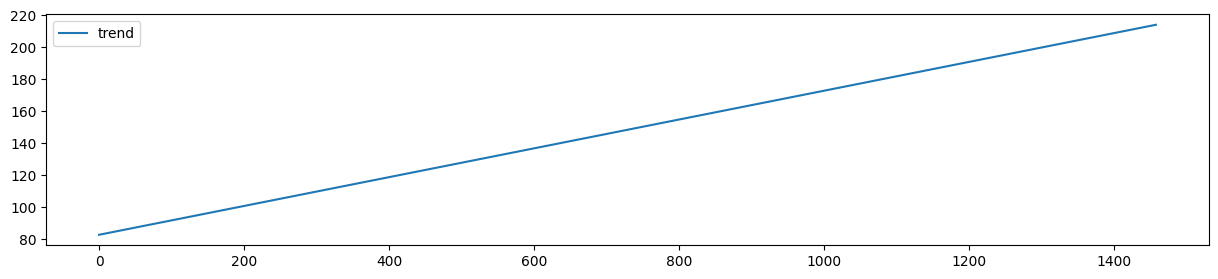

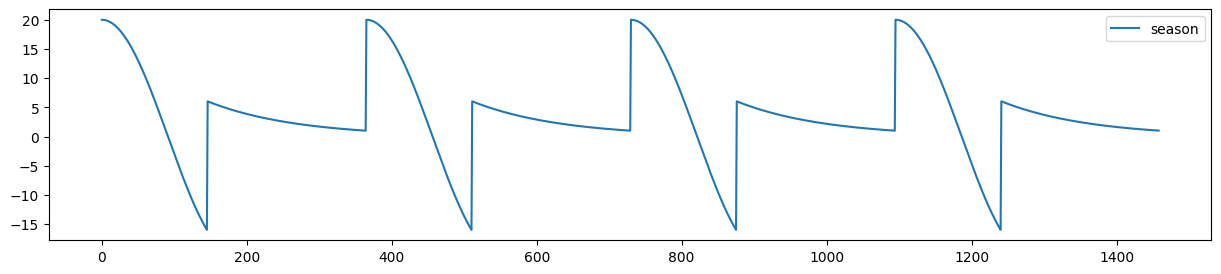

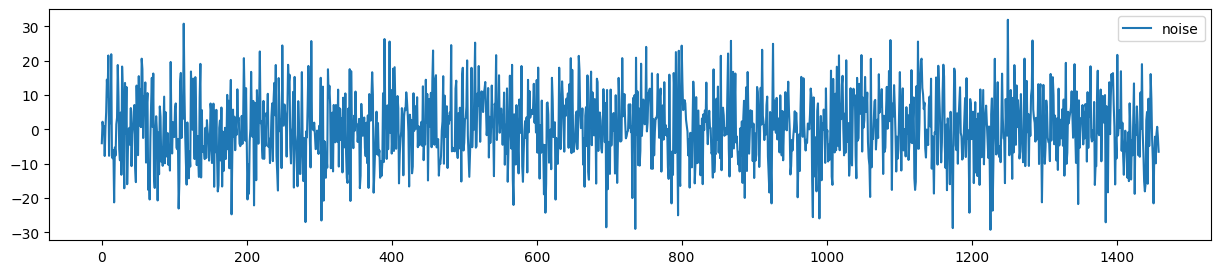

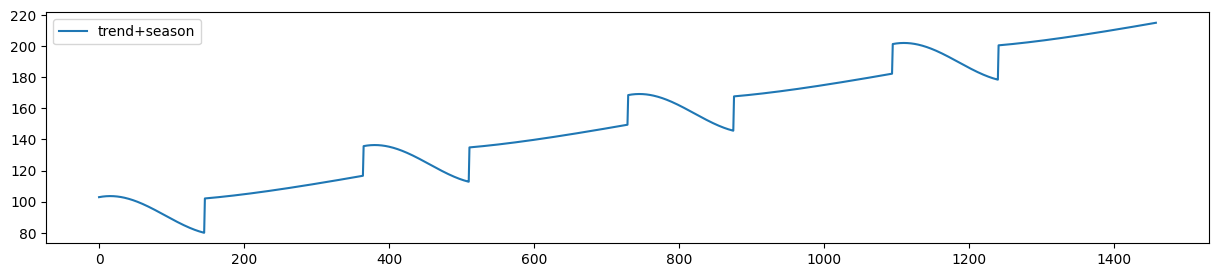

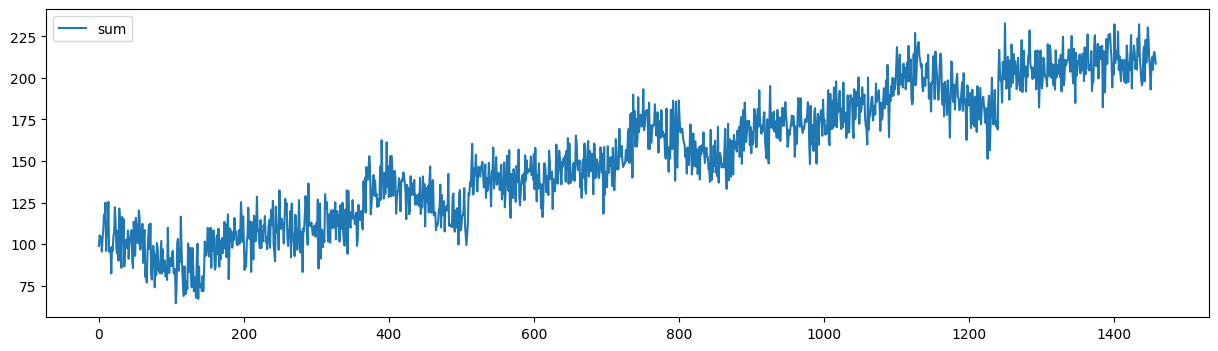

In [5]:
plt.figure(figsize=(15,3))
plt.plot(df_fulldata['trend_data'], label ='trend')
plt.legend()
plt.show()
plt.figure(figsize=(15,3))
plt.plot(df_fulldata['season_data'], label ='season')
plt.legend()
plt.show()
plt.figure(figsize=(15,3))
plt.plot(df_fulldata['noise_data'], label = 'noise')
plt.legend()
plt.show()
plt.figure(figsize=(15,3))
plt.plot(df_fulldata['actual'], label ='trend+season')
plt.legend()
plt.show()
plt.figure(figsize=(15,4))
plt.plot(df_fulldata['y'], label='sum')
plt.legend()
plt.show()

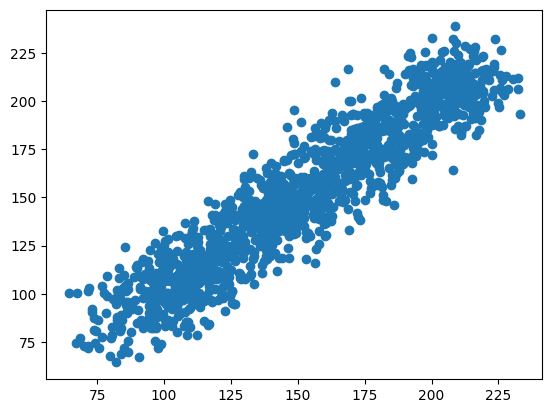

In [6]:
# Correlation
plt.scatter(df_fulldata['lag_0'],df_fulldata['y2'], label ='trend')

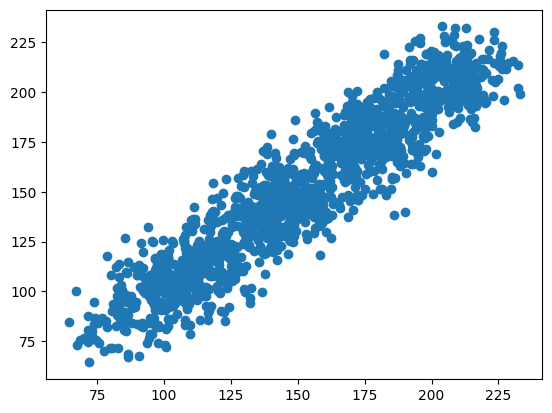

In [7]:
# Colinearity
plt.scatter(df_fulldata['lag_0'],df_fulldata['lag_1'], label ='trend')

# Moving average

## Y1

In [19]:
print(f"MAE Actual y1 : {MAE(df_fulldata['y1'], df_fulldata['actual_y1'])}")
print(f"MAE Actual y1 : {W_SMAPE(df_fulldata['y1'], df_fulldata['actual_y1'])}")

print("---- Error by Moving Average ----")
for i in list(range(2,15,2))+[30, 60, 180, 365]:
    mae_noise = MAE(df_fulldata['y1'], df_fulldata[f'ma_{i}'])
    mae_no_noise = MAE(df_fulldata['actual_y1'], df_fulldata[f'ma_{i}'])
    smape_noise = W_SMAPE(df_fulldata['y1'], df_fulldata[f'ma_{i}'])
    smape_no_noise = W_SMAPE(df_fulldata['actual_y1'], df_fulldata[f'ma_{i}'])
    print(f"ma_{i:<3} : {mae_noise:>5.2f} {smape_noise:>5.2f}% |{mae_no_noise:>5.2f} {smape_no_noise:>5.2f}%")
# Adding Noise to MA
print("---- Error by Moving Average + Noise ----")
for i in list(range(2,15,2))+[30, 60, 180, 365]:
    result = df_fulldata[f'ma_{i}'] + df_fulldata[f'diff_ma_{i}']
    mae_noise = MAE(df_fulldata['y1'], result)
    mae_no_noise = MAE(df_fulldata['actual_y1'], result)
    smape_noise = W_SMAPE(df_fulldata['y1'], result)
    smape_no_noise = W_SMAPE(df_fulldata['actual_y1'], result)
    print(f"ma_{i:<3} : {mae_noise:>5.2f} {smape_noise:>5.2f}% |{mae_no_noise:>5.2f} {smape_no_noise:>5.2f}%")

MAE Actual y1 : 7.98
MAE Actual y1 : 2.81
---- Error by Moving Average ----
ma_2   :  9.83  3.46% | 5.80  2.04%
ma_4   :  9.07  3.21% | 4.30  1.52%
ma_6   :  8.85  3.13% | 3.68  1.30%
ma_8   :  8.79  3.11% | 3.32  1.17%
ma_10  :  8.71  3.09% | 3.09  1.09%
ma_12  :  8.68  3.08% | 2.99  1.06%
ma_14  :  8.69  3.09% | 2.95  1.05%
ma_30  :  9.02  3.21% | 3.56  1.30%
ma_60  : 10.19  3.64% | 5.55  2.06%
ma_180 : 12.49  4.49% | 9.71  3.57%
ma_365 : 17.66  6.50% |16.07  6.05%
---- Error by Moving Average + Noise ----
ma_2   : 10.03  3.52% | 6.08  2.14%
ma_4   :  9.17  3.24% | 4.50  1.59%
ma_6   :  8.93  3.15% | 3.84  1.35%
ma_8   :  8.84  3.13% | 3.47  1.22%
ma_10  :  8.72  3.09% | 3.20  1.13%
ma_12  :  8.70  3.08% | 3.08  1.09%
ma_14  :  8.70  3.08% | 3.02  1.07%
ma_30  :  8.92  3.17% | 3.42  1.24%
ma_60  :  9.91  3.53% | 5.15  1.91%
ma_180 : 11.98  4.29% | 8.98  3.29%
ma_365 : 16.37  5.99% |14.60  5.46%


## Y2

In [20]:
print(f"MAE Actual y2 : {MAE(df_fulldata['y2'], df_fulldata['actual_y2'])}")
print(f"MAE Actual y2 : {W_SMAPE(df_fulldata['y2'], df_fulldata['actual_y2'])}")

print("---- Error by Moving Average ----")
for i in list(range(2,15,2))+[30, 60, 180, 365]:
    mae_noise = MAE(df_fulldata['y2'], df_fulldata[f'ma_{i}'])
    mae_no_noise = MAE(df_fulldata['actual_y2'], df_fulldata[f'ma_{i}'])
    smape_noise = W_SMAPE(df_fulldata['y2'], df_fulldata[f'ma_{i}'])
    smape_no_noise = W_SMAPE(df_fulldata['actual_y2'], df_fulldata[f'ma_{i}'])
    print(f"ma_{i:<3} : {mae_noise:>5.2f} {smape_noise:>5.2f}% |{mae_no_noise:>5.2f} {smape_no_noise:>5.2f}%")
# Adding Noise to MA
print("---- Error by Moving Average + Noise ----")
for i in list(range(2,15,2))+[30, 60, 180, 365]:
    result = df_fulldata[f'ma_{i}'] + df_fulldata[f'diff_ma_{i}']
    mae_noise = MAE(df_fulldata['y2'], result)
    mae_no_noise = MAE(df_fulldata['actual_y2'], result)
    smape_noise = W_SMAPE(df_fulldata['y2'], result)
    smape_no_noise = W_SMAPE(df_fulldata['actual_y2'], result)
    print(f"ma_{i:<3} : {mae_noise:>5.2f} {smape_noise:>5.2f}% |{mae_no_noise:>5.2f} {smape_no_noise:>5.2f}%")

MAE Actual y2 : 7.98
MAE Actual y2 : 2.81
---- Error by Moving Average ----
ma_2   :  9.75  3.45% | 5.89  2.07%
ma_4   :  9.08  3.22% | 4.41  1.56%
ma_6   :  8.95  3.17% | 3.78  1.33%
ma_8   :  8.85  3.14% | 3.42  1.21%
ma_10  :  8.78  3.12% | 3.21  1.13%
ma_12  :  8.74  3.10% | 3.10  1.10%
ma_14  :  8.77  3.11% | 3.08  1.10%
ma_30  :  9.11  3.24% | 3.72  1.36%
ma_60  : 10.30  3.67% | 5.71  2.12%
ma_180 : 12.55  4.50% | 9.80  3.60%
ma_365 : 17.73  6.52% |16.16  6.07%
---- Error by Moving Average + Noise ----
ma_2   :  9.91  3.51% | 6.17  2.17%
ma_4   :  9.18  3.25% | 4.60  1.62%
ma_6   :  9.00  3.18% | 3.94  1.39%
ma_8   :  8.91  3.16% | 3.57  1.26%
ma_10  :  8.82  3.13% | 3.31  1.17%
ma_12  :  8.76  3.10% | 3.20  1.13%
ma_14  :  8.79  3.12% | 3.14  1.12%
ma_30  :  9.02  3.20% | 3.58  1.30%
ma_60  : 10.04  3.58% | 5.31  1.96%
ma_180 : 12.06  4.32% | 9.06  3.32%
ma_365 : 16.45  6.01% |14.68  5.49%


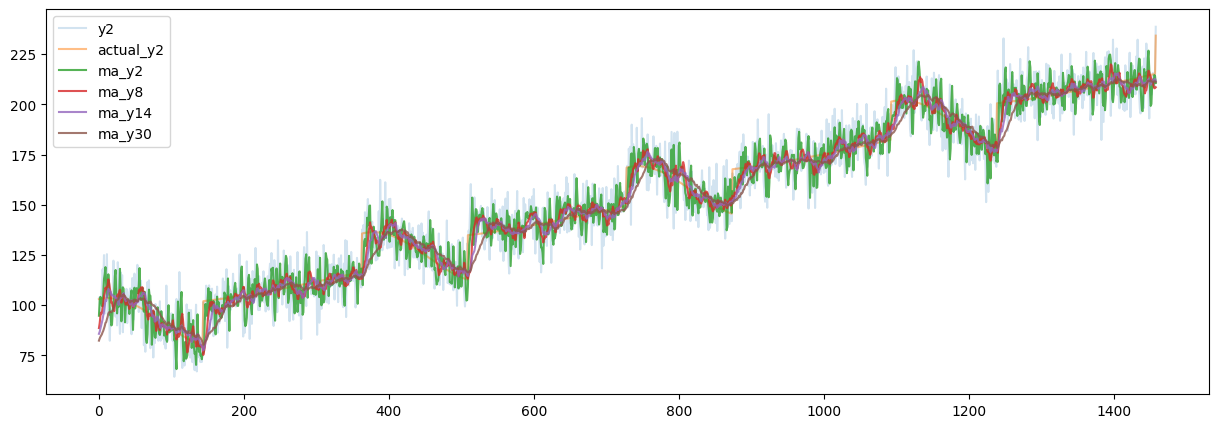

In [11]:
plt.figure(figsize=(15,5))
plt.plot(df_fulldata['y2'], label ='y2', alpha=0.2)
plt.plot(df_fulldata['actual_y2'], label ='actual_y2', alpha=0.5)
for i in [2,8,14,30]:
    plt.plot(df_fulldata[f'ma_{i}'], label =f'ma_y{i}', alpha=0.8)
plt.legend()
plt.show()

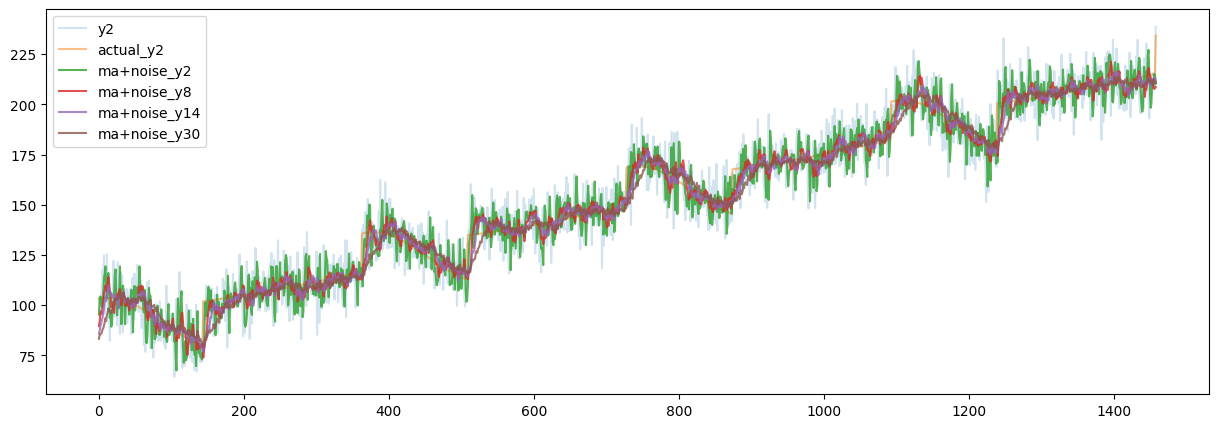

In [12]:
plt.figure(figsize=(15,5))
plt.plot(df_fulldata['y2'], label ='y2', alpha=0.2)
plt.plot(df_fulldata['actual_y2'], label ='actual_y2', alpha=0.5)
for i in [2,8,14,30]:
    result = df_fulldata[f'ma_{i}']+ df_fulldata[f'diff_ma_{i}']
    plt.plot(result, label =f'ma+noise_y{i}', alpha=0.8)
plt.legend()
plt.show()